In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
import seaborn as sb
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
df=pd.read_csv('data.csv')
x=df.shape
print("total no of rows and colomuns:",x)
df.head(8) # prints 8 rows from uploaded csv file

total no of rows and colomuns: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [3]:
df.isna().sum() # finds the sum of colomuns with missing val
df=df.dropna(axis=1) # drops the last col with empty val
df.shape

(569, 32)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

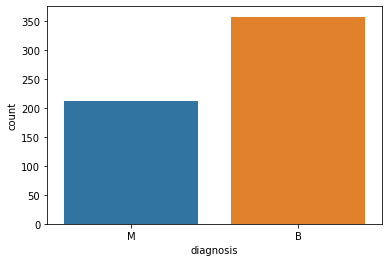

In [4]:
df['diagnosis'].value_counts()
sb.countplot(df['diagnosis'],label='count')

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

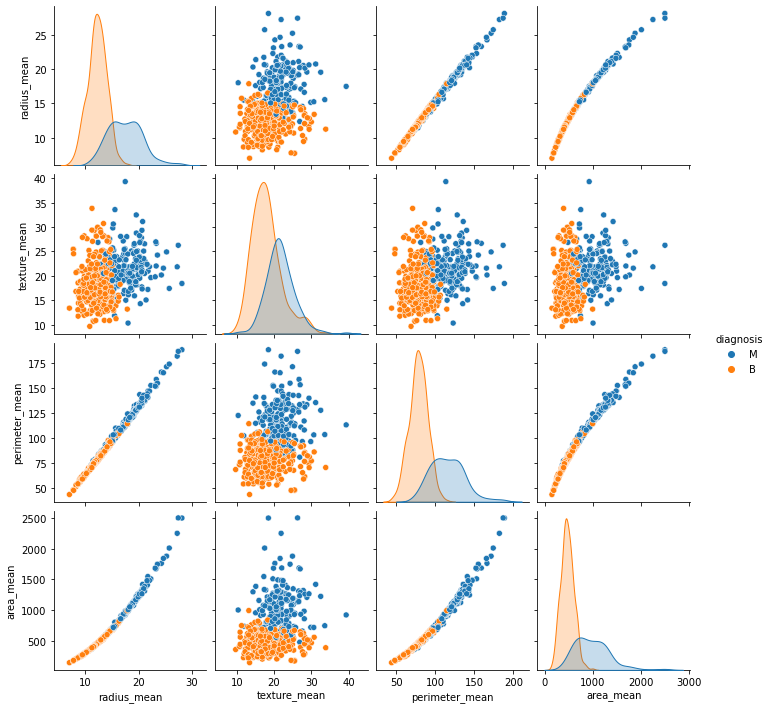

In [6]:
diag=sb.pairplot(df.iloc[:,1:6],hue='diagnosis')
diag.savefig("diag.png")


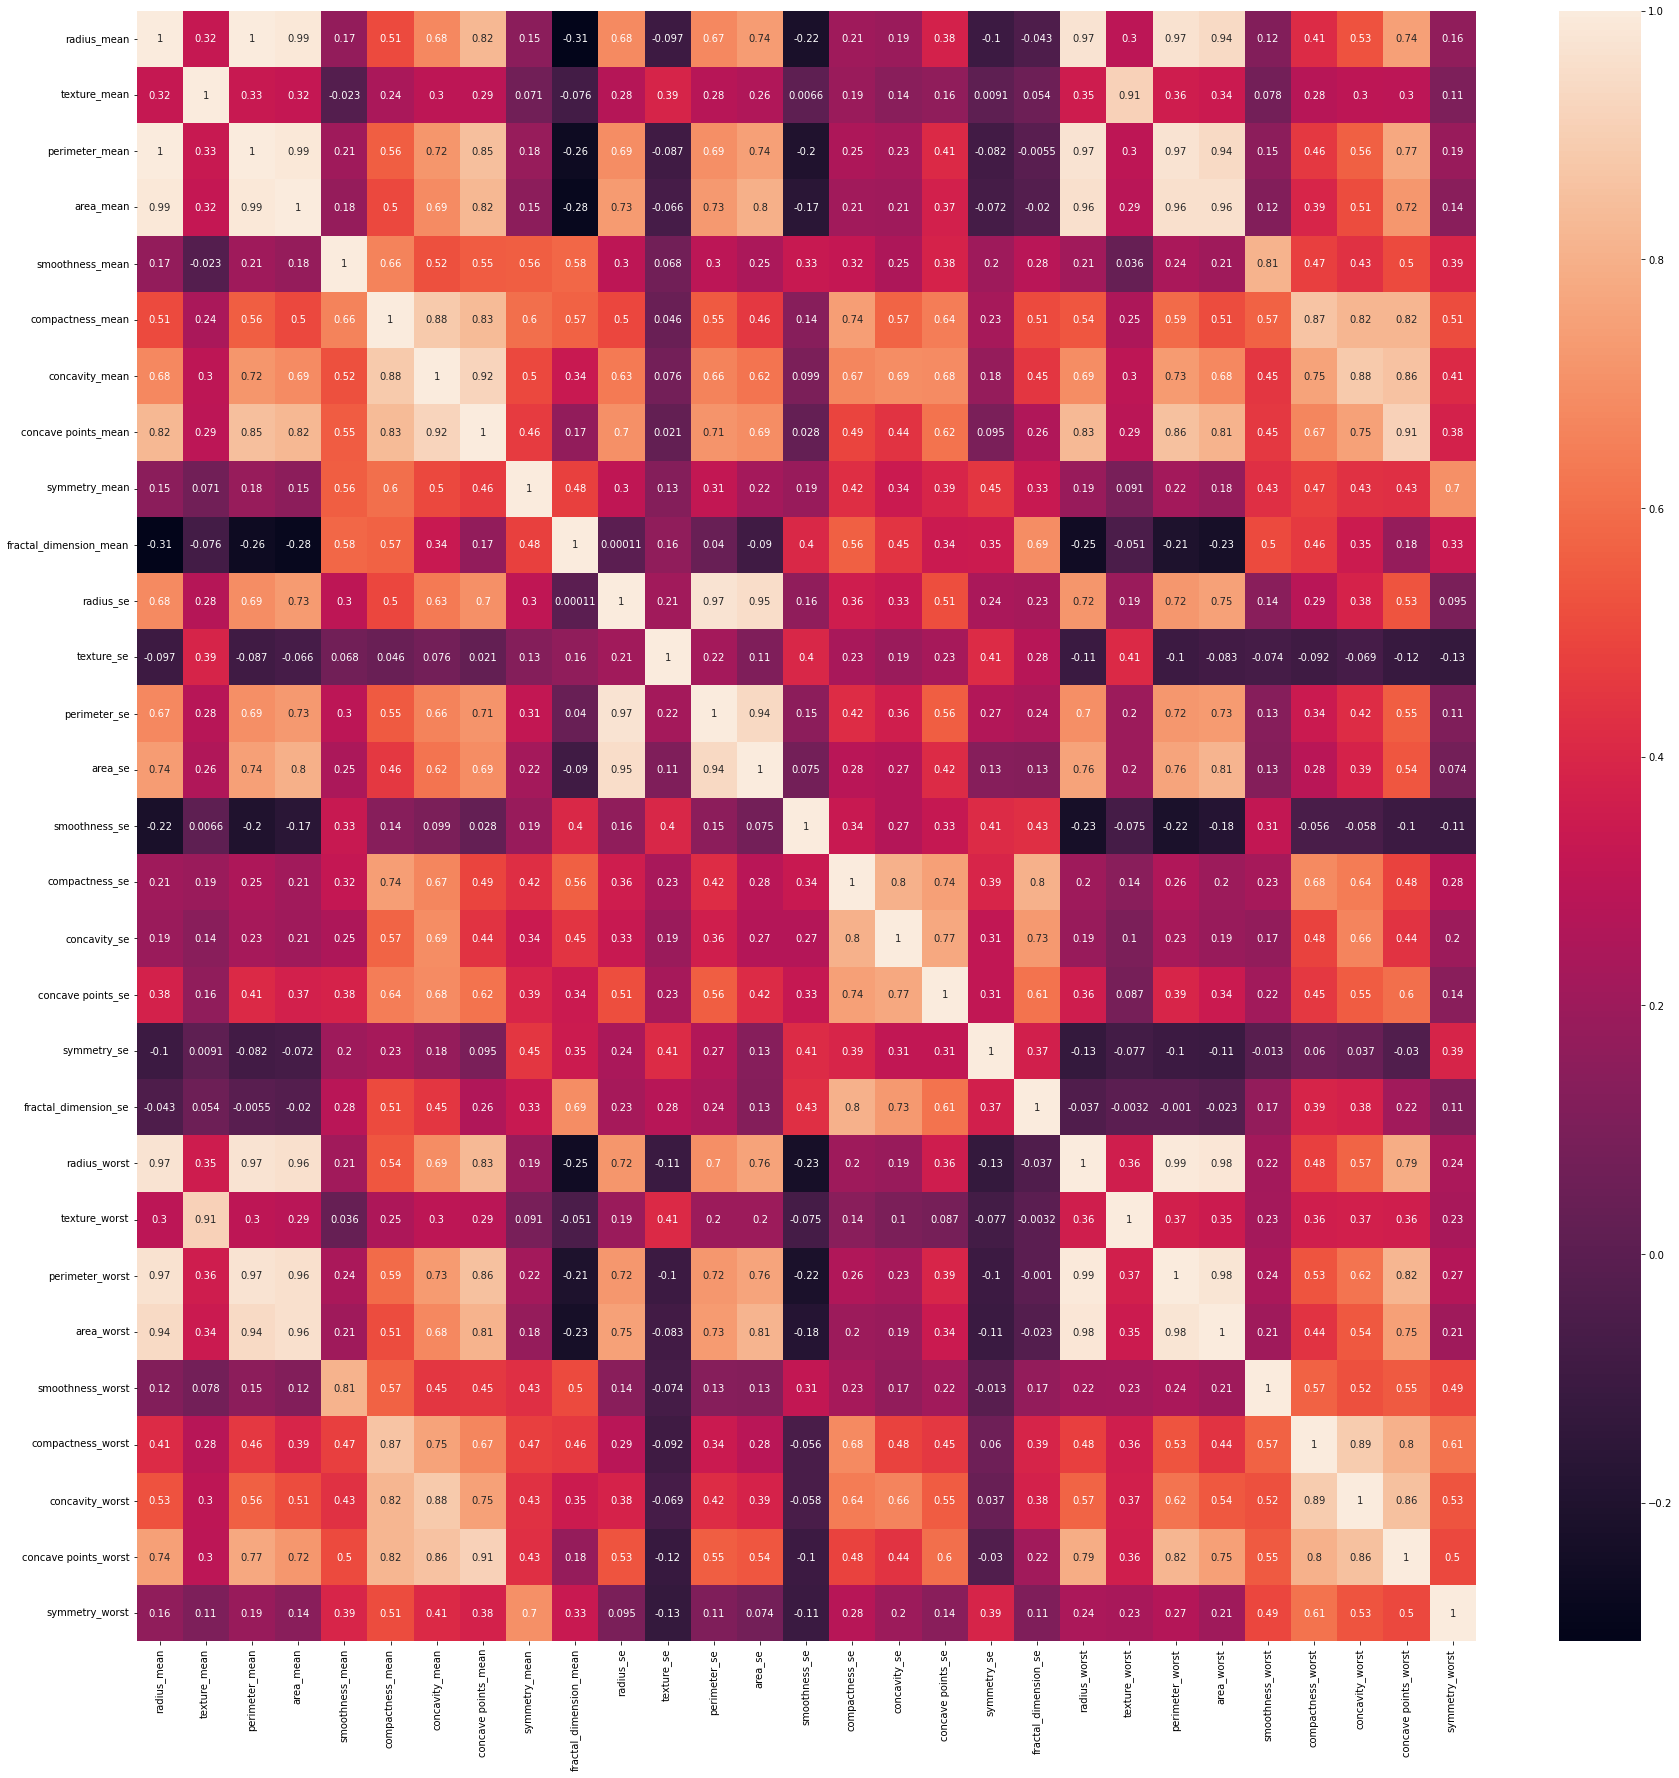

In [7]:
x=df.iloc[:,1:31].corr()
plt.figure(figsize=(30,30))
xx=sb.heatmap(x,annot=True)
figure = xx.get_figure()    
figure.savefig('features.png', dpi=400)

In [8]:
labelencoder_Y= LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [9]:
#splitting the data the into independent x a nd y data sets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values

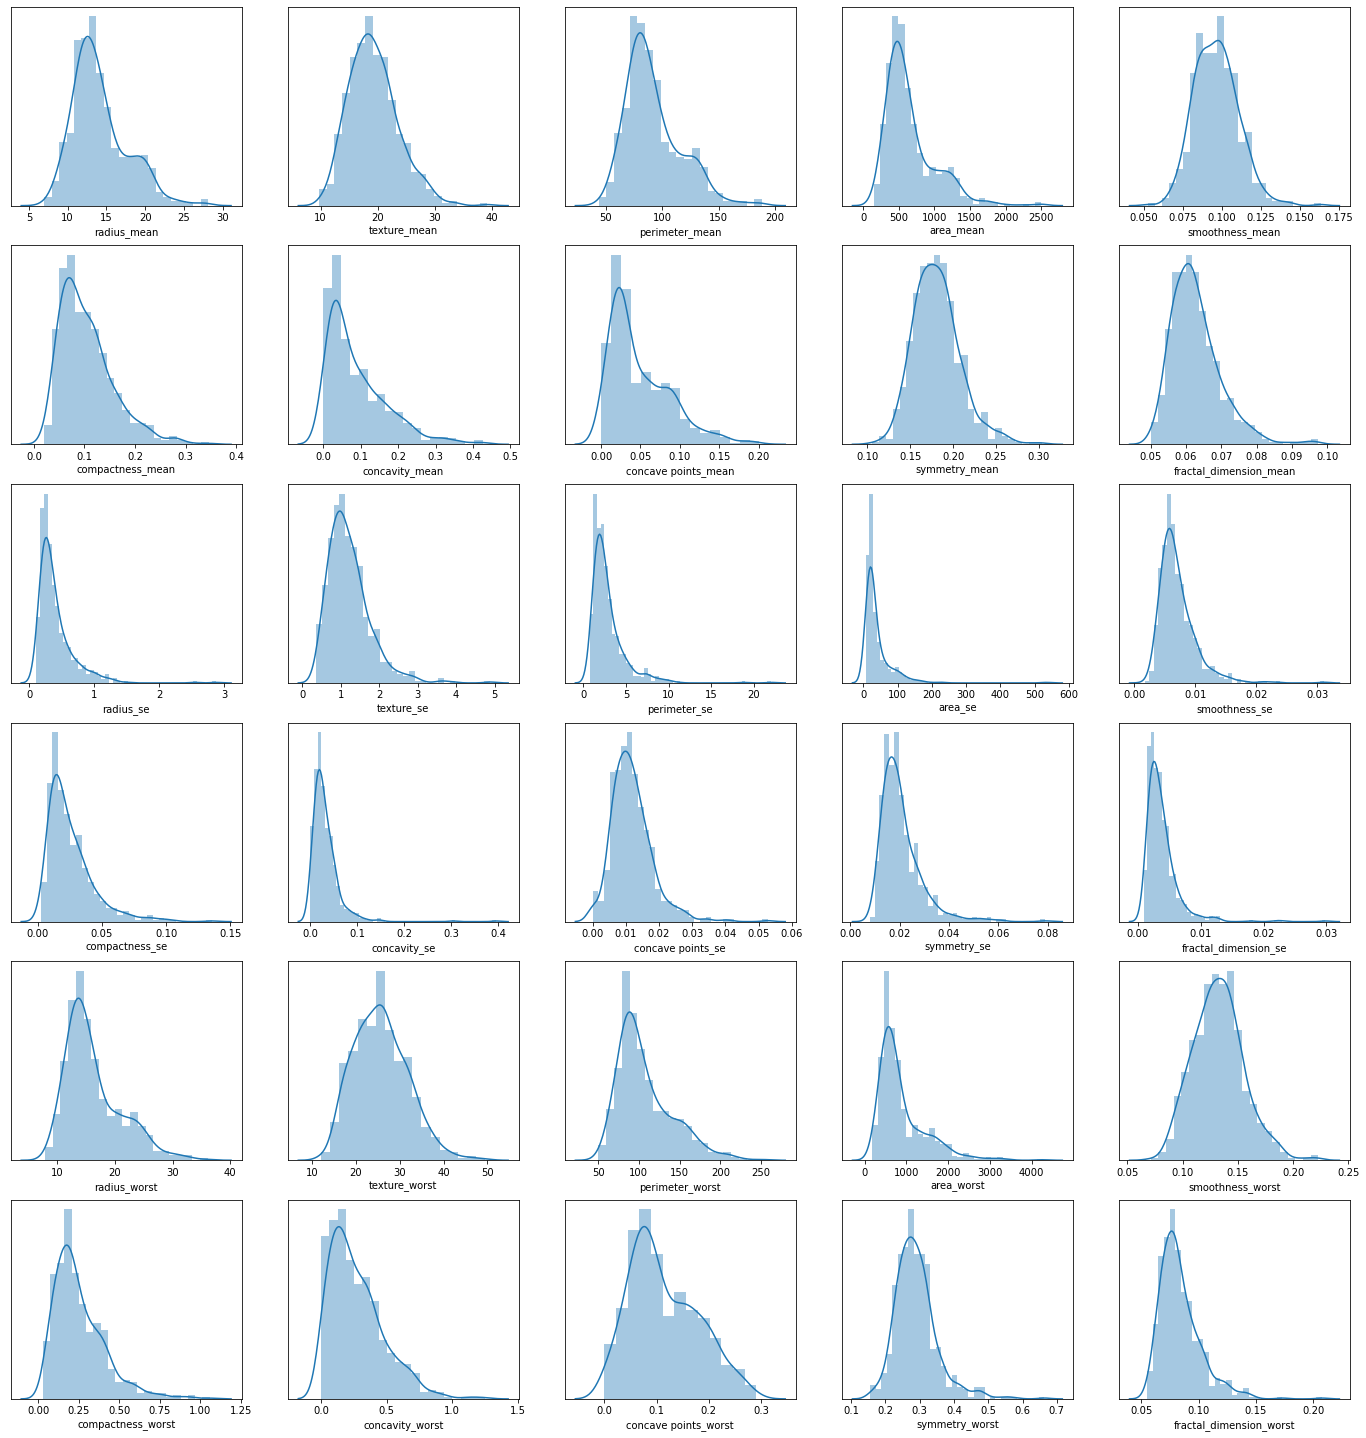

In [10]:
plt.figure(figsize=[24,30])
for i,feature in enumerate(df.iloc[:,2:]):
    plt.subplot(7,5,i+1)
    sb.distplot(df[feature])
    plt.yticks([])
    plt.ylabel('')
    plt.savefig("Out.png")
plt.show()

In [11]:
def trainData_testData_split(X, y, testPercentage, seed=1121):
    np.random.seed(seed)
    randomArray = np.random.rand(X.shape[0])
    splittedData = randomArray < np.percentile(randomArray, int((1 - testPercentage)*100))

    X_train = X[splittedData]
    y_train = y[splittedData]
    X_test  = X[~splittedData]
    y_test  = y[~splittedData]
    
    return X_train, X_test, y_train, y_test


In [12]:
X_train, X_test, y_train, y_test = trainData_testData_split(X, Y,0.25,0)

In [13]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [27]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print(predictions)
def get_confusion_matrix(l1, l2):

    assert len(l1)==len(l2), "Two lists have different size."

    K = len(np.unique(l1))

    # create label-index value
    label_index = dict(zip(np.unique(l1), np.arange(K)))

    result = np.zeros((K, K))
    for i in range(len(l1)):
        result [label_index[l1[i]]][label_index[l2[i]]] += 1
    

    return result.astype(int)
x=get_confusion_matrix(y_test,nb.predict(X_test))

[1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0]


In [15]:
print('-----------------')
print(x)
TP=x[0][0]
TP=int(TP)
FP=x[0][1]
FP=int(FP)
FN=x[1][0]
FN=int(FN)
TN=x[1][1]
TN=int(TN)
print(TP)
print(FP)
print(FN)
print(TN)
xax=TP+TN+FN+FP
Accuracy=(TP+TN)/(TP+TN+FN+FP)
recall= TP/(TP+FN)  # True positivetity rate
precision=TP/(TP+FP) #
f_1= 2*(recall*precision)/(precision+recall)
True_positivetity_rate= TP/(FN+TP)
True_Negitive_Rate=TN/(TN+FP)
False_Positive_rate= FP/(TN+FP)
mis_rate=(FP+FN)/xax # Error Rate
Prevalence=TP+FN/xax
print(f'Accuracy of the NB is :{Accuracy}')
print(f'recall of the NB is : {recall}')
print(f'precision of the NB is :{precision}')
print(f'F_1 Score of the NB is :{f_1}')
print("AUC")
print(f'False_Positive_rate of the NB is : {False_Positive_rate}')
print(f'True_Negitive_Rate  of the NB is: {True_Negitive_Rate}')
print(f'True positivetity rate of the NB is : {True_positivetity_rate}')
print(f'Misclassification Rate of the NB is : {mis_rate}')
print(f'Prevalence of the NB is : {Prevalence}')
#print(xax)

-----------------
[[87  4]
 [ 6 46]]
87
4
6
46
Accuracy of the NB is :0.9300699300699301
recall of the NB is : 0.9354838709677419
precision of the NB is :0.9560439560439561
F_1 Score of the NB is :0.9456521739130435
AUC
False_Positive_rate of the NB is : 0.08
True_Negitive_Rate  of the NB is: 0.92
True positivetity rate of the NB is : 0.9354838709677419
Misclassification Rate of the NB is : 0.06993006993006994
Prevalence of the NB is : 87.04195804195804


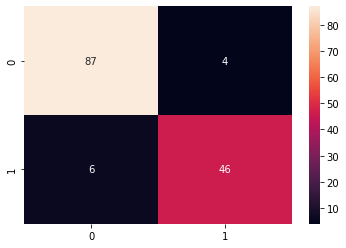

In [16]:
y=sb.heatmap(x ,annot=True)
figure = y.get_figure()
plt.show()
figure.savefig(f'confusionmatrix of NB.png')

In [24]:
print(new_data[0][1])

0.167061


In [21]:
type(new_data)

list

In [ ]:
n